# Plotting med Pandas
Pandas er en modul som baserer seg på to andre moduler - NumPy og Matplotlib. Mens Numpy og Matplotlib fungerer fint sammen så er mye av arbeidet med å plotte data gjort enklere i Pandas.

I dette eksempelet skal jeg bruke Pandas til å utforske data fra Yr, nærmere bestemt 


In [1]:
import pandas as pd

df = pd.read_html('https://www.yr.no/nb/historikk/tabell/1-211102/Norge/Tr%C3%B8ndelag/Trondheim/Trondheim?q=siste-30-dager')

# Hva slags type data er df?
print(type(df))

<class 'list'>


Ok, det er en liste. Hva er i første element av lista?

In [2]:
print(df[0])

                 Navn            Verdi
0  Høyeste (19. aug.)  Temperatur23,9°
1  Laveste (18. aug.)   Temperatur7,7°


Ok, disse verdiene korresponderer med tabellen for temperatur på toppen av siden. Hvis denne tanken er riktig vil det fjerde elementet inneholde data for forrige måned. La oss se om det stemmer.

In [3]:
df[3]

Dato Min. temp. Maks temp. Gjennomsnitt Normal temp.  \
0    1.0      11,8°      19,8°        15,9°        14,4°   
1    2.0      12,6°      20,2°        15,9°        14,3°   
2    3.0      12,1°      19,5°        15,2°        14,3°   
3    4.0      10,4°      15,6°        12,7°        14,2°   
4    5.0       9,9°      14,8°        12,4°        14,2°   
5    6.0      11,4°      16,6°        13,5°        14,2°   
6    7.0      11,3°      14,2°        12,1°        14,1°   
7    8.0      11,6°      18,4°        14,9°        14,0°   
8    9.0      13,1°      18,6°        16,0°        14,0°   
9   10.0      10,7°      17,7°        13,3°        13,9°   
10  11.0      10,3°      15,3°        12,2°        13,9°   
11  12.0      10,6°      17,3°        13,8°        13,8°   
12  13.0      10,0°      21,2°        15,5°        13,7°   
13  14.0      12,9°      19,1°        15,4°        13,6°   
14  15.0      11,9°      17,8°        15,0°        13,6°   
15  16.0      13,1°      16,8°        13,4°        13,5°   
16  17.0       9,8°      15,8°        12,5°        13,4°   
17  18.0       7,7°      19,9°        14,1°        13,3°   
18  19.0       9,7°      23,9°        18,4°        13,3°   
19  20.0      15,9°      21,5°        16,8°        13,2°   
20  21.0      14,1°      16,2°        14,8°        13,1°   

    Nedbør mm (måles kl 07) Snødybde cm Vind m/s Kraftigste vind m/s  
0                         0           –        -                   -  
1                         0           –        -                   -  
2                         0           –        -                   -  
3                         0           –        -                   -  
4                        11           –        -                   -  
5                         3           –        -                   -  
6                        50           –        -                   -  
7                       407           –        -                   -  
8                        97           –        -                   -  
9                         0           –        -                   -  
10                       13           –        -                   -  
11                       25           –        -                   -  
12                       19           –        -                   -  
13                        8           –        -                   -  
14                       37           –        -                   -  
15                      258           –        -                   -  
16                      141           –        -                   -  
17                        0           –        -                   -  
18                        0           –        -                   -  
19                        0           –        -                   -  
20                      145           –        -                   -

Dette stemmer perfekt! Nå kan vi for moro skyld se hva Pandas velger å plotte disse dataene som, uten at vi gjør noe som helst. Først kan vi sette df til df[3], siden vi i dette eksempelet kun bryr oss om denne fulle måneden.

<AxesSubplot:>

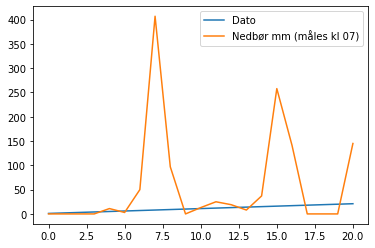

In [4]:
df = df[3]
df.plot()

Ok. Her ser vi at den plotter to ting: Dato og nedbør. Først av alt vil jeg fjerne dato - vi kan jo bare bruke indeksen. Eneste problemet er at indeks begynner på 0, så vi må endre denne til å begynne på 1.

<AxesSubplot:>

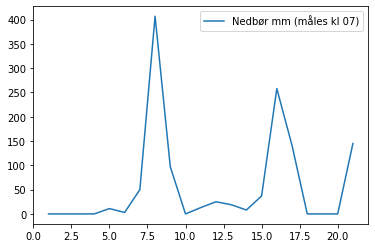

In [5]:
df.index = df.index+1
del df['Dato']
df.plot()




Hvis den fant nedbør, hvorfor viste den da ikke temperaturene også? La oss sjekke hva slags datatyper de ulike kolonnene inneholder.

In [6]:
df.dtypes

Min. temp.                 object
Maks temp.                 object
Gjennomsnitt               object
Normal temp.               object
Nedbør mm (måles kl 07)     int64
Snødybde cm                object
Vind m/s                   object
Kraftigste vind m/s        object
dtype: object

Nedbøren er et heltall, dato er float (husk at dette er automatisk laget og kan endres) mens de andre er *object*. Dette betyr stort sett at de er strenger. Da er det ikke rart at man sliter med å plotte verdiene. Men det bør vel være en måte å endre disse verdiene?

In [7]:
'''
Her lager jeg en kjapp funksjon som først fjerner det siste tegnet av en streng.
Deretter gjør den om et komma til et punktum (som brukes i flyttall)
Til slutt returnerer den en floatverdi gitt denne strengen.
'''

def konverter_til_float(streng):
    streng = streng.rstrip(streng[-1])
    streng = streng.replace(",",".")
    return float(streng)

df.Gjennomsnitt = df.Gjennomsnitt.apply(konverter_til_float)
df



Min. temp. Maks temp.  Gjennomsnitt Normal temp.  Nedbør mm (måles kl 07)  \
1       11,8°      19,8°          15.9        14,4°                        0   
2       12,6°      20,2°          15.9        14,3°                        0   
3       12,1°      19,5°          15.2        14,3°                        0   
4       10,4°      15,6°          12.7        14,2°                        0   
5        9,9°      14,8°          12.4        14,2°                       11   
6       11,4°      16,6°          13.5        14,2°                        3   
7       11,3°      14,2°          12.1        14,1°                       50   
8       11,6°      18,4°          14.9        14,0°                      407   
9       13,1°      18,6°          16.0        14,0°                       97   
10      10,7°      17,7°          13.3        13,9°                        0   
11      10,3°      15,3°          12.2        13,9°                       13   
12      10,6°      17,3°          13.8        13,8°                       25   
13      10,0°      21,2°          15.5        13,7°                       19   
14      12,9°      19,1°          15.4        13,6°                        8   
15      11,9°      17,8°          15.0        13,6°                       37   
16      13,1°      16,8°          13.4        13,5°                      258   
17       9,8°      15,8°          12.5        13,4°                      141   
18       7,7°      19,9°          14.1        13,3°                        0   
19       9,7°      23,9°          18.4        13,3°                        0   
20      15,9°      21,5°          16.8        13,2°                        0   
21      14,1°      16,2°          14.8        13,1°                      145   

   Snødybde cm Vind m/s Kraftigste vind m/s  
1            –        -                   -  
2            –        -                   -  
3            –        -                   -  
4            –        -                   -  
5            –        -                   -  
6            –        -                   -  
7            –        -                   -  
8            –        -                   -  
9            –        -                   -  
10           –        -                   -  
11           –        -                   -  
12           –        -                   -  
13           –        -                   -  
14           –        -                   -  
15           –        -                   -  
16           –        -                   -  
17           –        -                   -  
18           –        -                   -  
19           –        -                   -  
20           –        -                   -  
21           –        -                   -

<AxesSubplot:>

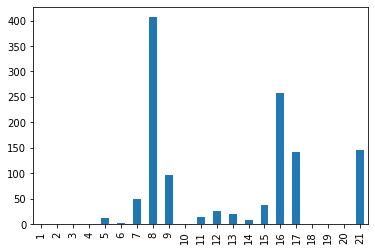

In [8]:
df['Nedbør mm (måles kl 07)'].plot.bar()

Problemet med å vise disse to grafene på samme tid er at det er vanskelig å se variasjon i gjennomsnittet. La oss plotte bare grafen for Gjennomsnitt (av temperatur hver dag), nå *[med](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)* en annen *[visningsform](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)*.

<AxesSubplot:>

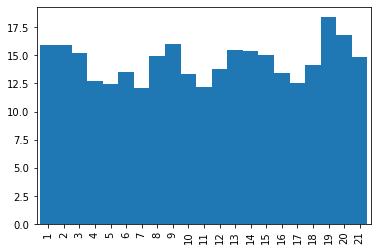

In [9]:
#df.Gjennomsnitt.plot()
df['Gjennomsnitt'].plot(kind="bar",stacked=True,width = 1)

Men, la oss se litt nærmere på nedbør. Kan vi få til å tegne opp kumulativ nedbør? For å gjøre det kan jeg lage en ny kolonne, og her legger jeg den kumulative nedbøren. *[df.cumsum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumsum.html)* passer perfekt til dette. I tillegg ønsker jeg bare å plotte verdiene for nedbør og totalregn. Det gjør jeg ved å legge navnene på disse to kolonnene inn i en liste.

<AxesSubplot:>

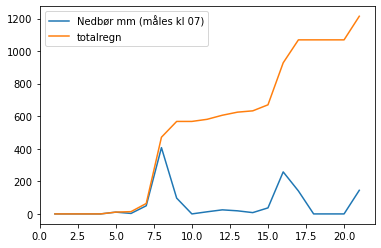

In [10]:
df['totalregn'] = df['Nedbør mm (måles kl 07)'].cumsum()
df[['Nedbør mm (måles kl 07)','totalregn']].plot()

## Oppsummering
I dette eksempelet har vi vist en del ulike ting:

- hvor enkelt det er å bruke Pandas til å hente inn data fra en ekstern kilde. Husk at Yr.no leverer nye data hele tiden, så dette eksempelet vil vise ulike grafer avhengig av når en ser det.
- jobbe seg igjennom en datastruktur for å finne det man er ute etter.
- plotting noe uten å gjøre noe som helst, for å utforske data.
- endring av verdier i en kolonne ved å kalle en ekstern funksjon.
- valg av hvilke kolonner som skal plottes.
- plotting har mange visningstyper.
- lage en ny kolonne som er en kumulativ sum av en annen kolonne.